Colab - Identificação de Medicamentos

Thiago Vilar

Importação e Pré-processamento dos Dados

Este bloco inicializa o processo de análise de dados para KNN, algoritmos de aprendizado supervisionado.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carregando o dataset
url = 'https://raw.githubusercontent.com/thiago-vilar/monografia_id/main/medicine_attributes%20-%20principal.csv'
data = pd.read_csv(url)

# Removendo colunas não numéricas ou não relevantes
data_cleaned = data.drop(columns= ['Chain Code Length', 'Chain Code'])  # Colunas removidas

# Convertendo categorias em valores numéricos
label_encoder = LabelEncoder()
data_cleaned['Medicine Type'] = label_encoder.fit_transform(data_cleaned['Medicine Type'])

# Visualizando as primeiras linhas dos dados preparados
data_cleaned.head()


,Medicine Type,Width (mm),Height (mm),Mask Area (mm^2),Perimeter (mm),Aspect Ratio,Extent,Solidity,Histogram R Mean,Histogram R StdDev,Histogram G Mean,Histogram G StdDev,Histogram B Mean,Histogram B StdDev,Histogram Gray Mean,Histogram Gray StdDev
0,0,12.24,32.54,182.54,123.77,0.38,0.46,0.66,60.50,158.71,60.51,158.45,57.58,163.09,60.34,159.76
1,0,13.13,32.84,232.21,139.72,0.40,0.54,0.75,60.50,158.71,60.51,158.45,57.58,163.09,60.34,159.76
2,0,12.84,32.84,203.52,158.35,0.39,0.48,0.66,57.01,146.76,57.27,147.86,54.29,148.43,57.07,149.14
3,0,13.13,34.93,198.57,215.39,0.38,0.43,0.58,58.50,153.83,58.88,152.40,56.45,161.88,58.57,153.85
4,0,14.55,36.06,235.17,171.56,0.40,0.45,0.64,52.34,114.33,52.42,111.91,51.73,118.29,52.24,113.44


###**KNN** e Seleção de Atributos
Aplicação do **KNN (K-Nearest Neighbors)** para classificar os medicamentos com base nos atributos fornecidos no dataset.

Seleção de características para determinar quais atributos são mais importantes para a classificação.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Separando os dados em características (features) e alvo (target)
X = data_cleaned.drop('Medicine Type', axis=1)
y = data_cleaned['Medicine Type']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predições e relatório de classificação
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Seleção de características usando ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores_}).sort_values(by='Importance', ascending=False)
feature_scores



              precision    recall  f1-score   support

     Ampoule       1.00      1.00      1.00        66
       Flask       1.00      1.00      1.00        47
        Pill       1.00      1.00      1.00        37

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



,Feature,Importance
0,Width (mm),16246.349318
2,Mask Area (mm^2),7322.670192
4,Aspect Ratio,3420.446473
7,Histogram R Mean,1607.977718
9,Histogram G Mean,1533.286649
11,Histogram B Mean,1421.498621
13,Histogram Gray Mean,1417.383481
3,Perimeter (mm),948.373556
5,Extent,798.770144
10,Histogram G StdDev,733.882805


Gráfico de análise dos resultados

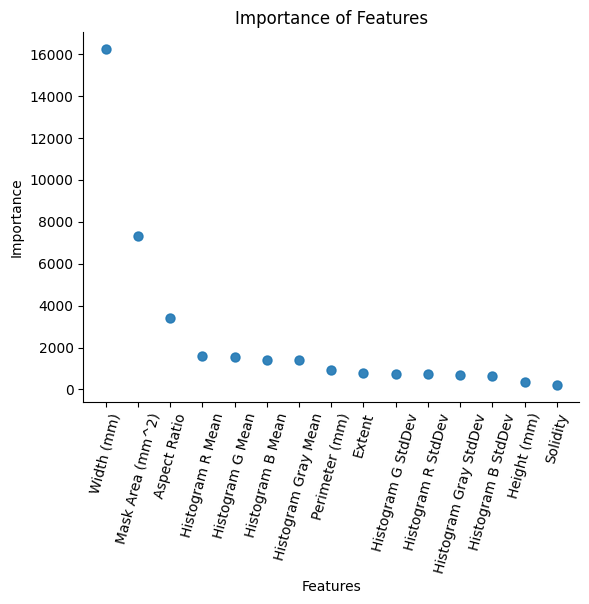

In [ ]:
import matplotlib.pyplot as plt
# Se 'Feature' ainda não é uma coluna, ou se precisamos resetar o índice corretamente
if 'Feature' not in feature_scores.columns:
    # Resetar o índice e verificar se o nome do índice antigo precisa ser mantido
    feature_scores.reset_index(inplace=True)
    # Se o índice anterior estava nomeado, atualizar para 'Feature'
    if 'index' in feature_scores.columns:
        feature_scores.rename(columns={'index': 'Feature'}, inplace=True)

# Plotando os dados com nomes de atributos e suas importâncias
feature_scores.plot(kind='scatter', x='Feature', y='Importance', s=42, alpha=0.9)

# Configurações visuais adicionais
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of Features')
plt.xticks(rotation=75)  # Rotação dos rótulos de atributos
plt.show()


Width (mm) e Mask Area (mm^2) são as características com as maiores pontuações de importância, indicando que as dimensões físicas dos medicamentos são extremamente relevantes para diferenciá-los em categorias.

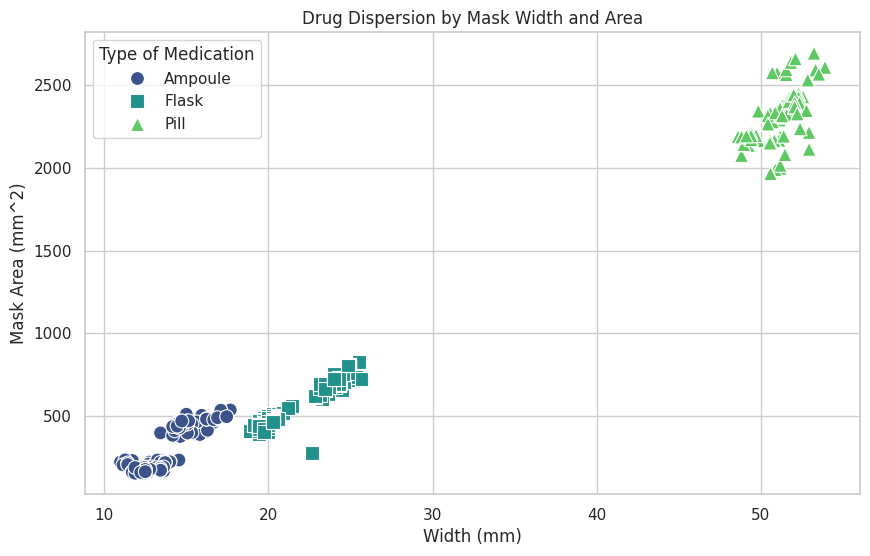

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revertendo os valores numéricos para nomes de medicamentos
data_cleaned['Medicine Type'] = label_encoder.inverse_transform(data_cleaned['Medicine Type'])

# Dados para o gráfico
sns.set(style="whitegrid")

# Criando o gráfico de dispersão usando Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Width (mm)', y='Mask Area (mm^2)', hue='Medicine Type', data=data_cleaned, palette='viridis', style='Medicine Type', markers=['o', 's', '^'], s=100)
plt.title('Drug Dispersion by Mask Width and Area')
plt.xlabel('Width (mm)')
plt.ylabel('Mask Area (mm^2)')
plt.legend(title='Type of Medication')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


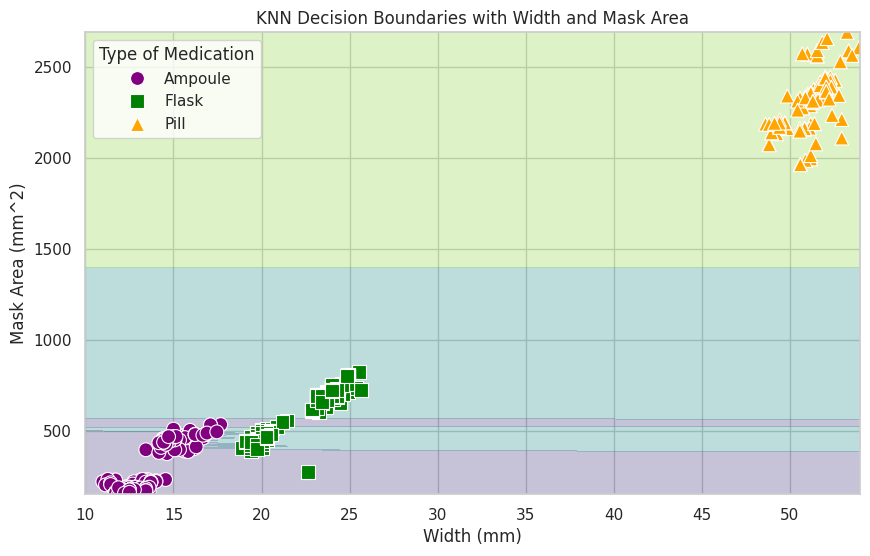

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Suponha que data_cleaned já contém a coluna 'Medicine Type' com nomes corretos ['Ampoule', 'Flask', 'Pill']

# Preparando o LabelEncoder e codificando os tipos de medicamentos
label_encoder = LabelEncoder()
data_cleaned['Medicine Type Encoded'] = label_encoder.fit_transform(data_cleaned['Medicine Type'])
med_names = label_encoder.classes_  # Isso deve conter ['Ampoule', 'Flask', 'Pill']

# Ajustando o modelo KNN
knn_decision = KNeighborsClassifier(n_neighbors=5)
knn_decision.fit(data_cleaned[['Width (mm)', 'Mask Area (mm^2)']], data_cleaned['Medicine Type Encoded'])

# Configurando a malha para visualização das fronteiras de decisão
step_size = 1
x_min, x_max = data_cleaned['Width (mm)'].min() - 1, data_cleaned['Width (mm)'].max() + 1
y_min, y_max = data_cleaned['Mask Area (mm^2)'].min() - 1, data_cleaned['Mask Area (mm^2)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
Z = knn_decision.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Mapeando codificações de volta para nomes para a legenda e usando cores e marcadores corretos
palette = {'Ampoule': 'purple', 'Flask': 'green', 'Pill': 'orange'}
markers = {'Ampoule': 'o', 'Flask': 's', 'Pill': '^'}

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=np.arange(len(med_names)+1)-0.5, extend='both')
sns.scatterplot(
    x='Width (mm)',
    y='Mask Area (mm^2)',
    hue='Medicine Type',
    data=data_cleaned,
    palette=palette,
    style='Medicine Type',
    markers=markers,
    s=100,
    edgecolor='w'
)
plt.title('KNN Decision Boundaries with Width and Mask Area')
plt.xlabel('Width (mm)')
plt.ylabel('Mask Area (mm^2)')
plt.legend(title='Type of Medication')
plt.show()


Predições Numéricas

In [ ]:
import pandas as pd
import numpy as np

# Mapeamento manual dos valores numéricos para os nomes corretos
mapping = {0: 'Ampoule', 1: 'Flask', 2: 'Pill'}

# Supondo que 'Medicine Type Encoded' é a coluna com os números 0, 1, 2
data_cleaned['Medicine Type'] = data_cleaned['Medicine Type Encoded'].map(mapping)

# Agora os nomes estão corretos, prosseguimos com as análises
# Calcular estatísticas descritivas
stats_df = data_cleaned.groupby('Medicine Type').agg({
    'Width (mm)': ['mean', 'std', 'count'],
    'Mask Area (mm^2)': ['mean', 'std', 'count']
}).round(2)

# Função para calcular percentis de forma explícita
def calculate_percentiles(data, percentiles):
    results = {}
    for medicine_type, group in data.groupby('Medicine Type'):
        width_percentiles = np.percentile(group['Width (mm)'], percentiles)
        mask_percentiles = np.percentile(group['Mask Area (mm^2)'], percentiles)

        results[medicine_type] = {
            'Width Lower': width_percentiles[0],
            'Width Upper': width_percentiles[1],
            'Mask Area Lower': mask_percentiles[0],
            'Mask Area Upper': mask_percentiles[1]
        }
    return pd.DataFrame.from_dict(results, orient='index')

# Definindo os percentis (0% e 100%)
percentile_values = [0, 100]

# Percentis para largura e área
percentiles_df = calculate_percentiles(data_cleaned, percentile_values)

# Exibindo os resultados
print("Thresholds:")
print(percentiles_df)


Thresholds:
         Width Lower  Width Upper  Mask Area Lower  Mask Area Upper
Ampoule        10.99        17.68           155.22           537.07
Flask          18.86        25.67           276.69           826.93
Pill           48.61        53.91          1964.49          2691.29


**Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=best_n)
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print(f"Acurácia média: {cv_scores.mean():.2f}")
print(f"Desvio padrão: {cv_scores.std():.2f}")


Acurácia média: 0.99
Desvio padrão: 0.01


###**Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import graphviz

# Carregando e preparando os dados
url = 'https://raw.githubusercontent.com/thiago-vilar/monografia_id/main/medicine_attributes%20-%20principal.csv'
data = pd.read_csv(url)
data_cleaned = data.drop(columns=['Chain Code Length', 'Chain Code'])  # Removendo colunas não relevantes
label_encoder = LabelEncoder()
data_cleaned['Medicine Type'] = label_encoder.fit_transform(data_cleaned['Medicine Type'])  # Convertendo categorias

# Separação dos dados
X = data_cleaned.drop('Medicine Type', axis=1)
y = data_cleaned['Medicine Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Avaliação do modelo
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia da Árvore de Decisão: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Visualização da árvore
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=X.columns,
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")  # Salva a visualização em um arquivo

# Importância dos atributos
importances = decision_tree.feature_importances_
importance_df = pd.DataFrame({'Atributos': X.columns, 'Importância': importances}).sort_values(by='Importância', ascending=False)
print(importance_df)


Acurácia da Árvore de Decisão: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        37

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

                Atributos  Importância
0              Width (mm)          1.0
1             Height (mm)          0.0
2        Mask Area (mm^2)          0.0
3          Perimeter (mm)          0.0
4            Aspect Ratio          0.0
5                  Extent          0.0
6                Solidity          0.0
7        Histogram R Mean          0.0
8      Histogram R StdDev          0.0
9        Histogram G Mean          0.0
10     Histogram G StdDev          0.0
11       Histogram B Mean          0.0
12     Histogram B StdDev          0.0
13    Histogram Gray Mean          0.